In [36]:
import pandas as pd
import numpy as np
import random
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

In [37]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(42) # Seed 고정

In [38]:
train = pd.read_csv("C:/Users/user/Desktop/흡연여부/open/train.csv")
test = pd.read_csv("C:/Users/user/Desktop/흡연여부/open/test.csv")
sample_submission= pd.read_csv("C:/Users/user/Desktop/흡연여부/open/sample_submission.csv")
train.head()

,ID,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
0,TRAIN_0000,35,170,70,24.22,1.10,1,98,40,80,1.3,211,75,120,15.9,1,1.53,1
1,TRAIN_0001,40,150,55,24.44,1.00,0,173,39,104,0.6,251,46,184,11.8,1,1.45,0
2,TRAIN_0002,60,170,50,17.30,0.75,0,96,40,61,0.8,144,43,89,15.3,1,1.04,0
3,TRAIN_0003,40,150,45,20.00,0.50,0,92,40,46,0.7,178,66,110,13.4,1,1.18,0
4,TRAIN_0004,55,155,65,27.06,1.00,0,87,42,95,0.9,232,62,151,13.8,1,1.32,0


In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        7000 non-null   object 
 1   나이        7000 non-null   int64  
 2   키(cm)     7000 non-null   int64  
 3   몸무게(kg)   7000 non-null   int64  
 4   BMI       7000 non-null   float64
 5   시력        7000 non-null   float64
 6   충치        7000 non-null   int64  
 7   공복 혈당     7000 non-null   int64  
 8   혈압        7000 non-null   int64  
 9   중성 지방     7000 non-null   int64  
 10  혈청 크레아티닌  7000 non-null   float64
 11  콜레스테롤     7000 non-null   int64  
 12  고밀도지단백    7000 non-null   int64  
 13  저밀도지단백    7000 non-null   int64  
 14  헤모글로빈     7000 non-null   float64
 15  요 단백      7000 non-null   int64  
 16  간 효소율     7000 non-null   float64
 17  label     7000 non-null   int64  
dtypes: float64(5), int64(12), object(1)
memory usage: 984.5+ KB


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        3000 non-null   object 
 1   나이        3000 non-null   int64  
 2   키(cm)     3000 non-null   int64  
 3   몸무게(kg)   3000 non-null   int64  
 4   BMI       3000 non-null   float64
 5   시력        3000 non-null   float64
 6   충치        3000 non-null   int64  
 7   공복 혈당     3000 non-null   int64  
 8   혈압        3000 non-null   int64  
 9   중성 지방     3000 non-null   int64  
 10  혈청 크레아티닌  3000 non-null   float64
 11  콜레스테롤     3000 non-null   int64  
 12  고밀도지단백    3000 non-null   int64  
 13  저밀도지단백    3000 non-null   int64  
 14  헤모글로빈     3000 non-null   float64
 15  요 단백      3000 non-null   int64  
 16  간 효소율     3000 non-null   float64
dtypes: float64(5), int64(11), object(1)
memory usage: 398.6+ KB


In [41]:
train = train.drop(['ID'], axis = 1)
test = test.drop('ID', axis = 1)

<Figure size 864x576 with 0 Axes>

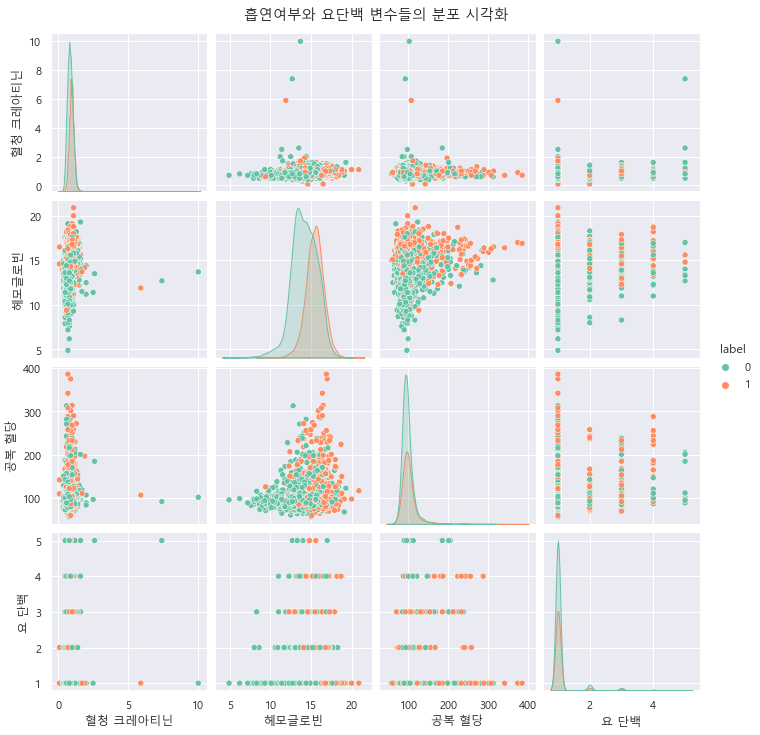

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(12, 8))

# 요단백 관련 변수들의 분포 시각화
selected_vars = ['혈청 크레아티닌','헤모글로빈', '공복 혈당', '요 단백', 'label']
sns.pairplot(data=train[selected_vars], hue='label', palette='Set2', diag_kind='kde')

plt.suptitle("흡연여부와 요단백 변수들의 분포 시각화", y=1.02)
plt.show()

<AxesSubplot:title={'center':'Person Correlation of Features'}>

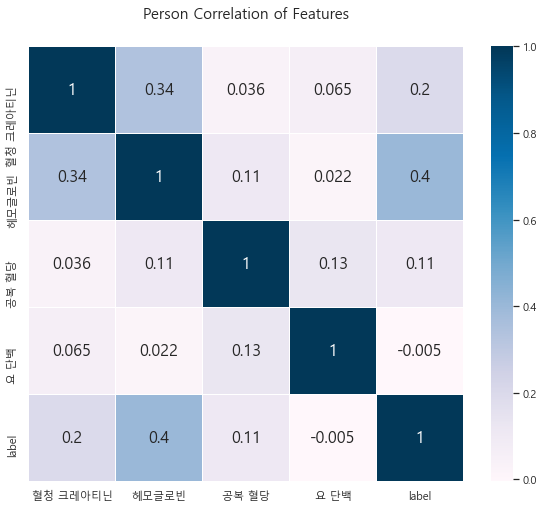

In [43]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data=train[selected_vars].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [44]:
#요 단백과 흡연여부는 거의 관련이 없음
#흡연시 헤모글로빈이 높게 유지된다고 볼수있음

<Figure size 864x576 with 0 Axes>

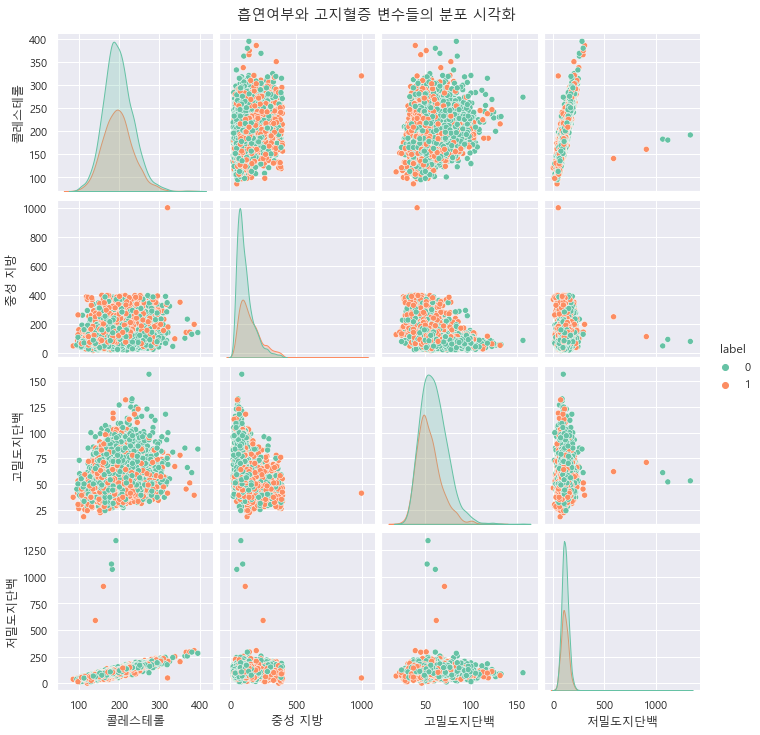

In [45]:
# 콜레스테롤, 중성지방, 고밀도지단백(hdl-콜레스테롤), 저밀도지단백(ldl-콜레스테롤)
#고밀도지단백은 혈관청소하는 좋은 콜레스테롤, 저밀도지단백은 동맥경화의 원인->악영향
plt.figure(figsize=(12, 8))

# 고지혈증 관련 변수들의 분포 시각화
selected_vars2 = ['콜레스테롤', '중성 지방', '고밀도지단백', '저밀도지단백', 'label']
sns.pairplot(data=train[selected_vars2], hue='label', palette='Set2', diag_kind='kde')

plt.suptitle("흡연여부와 고지혈증 변수들의 분포 시각화", y=1.02)
plt.show()

<AxesSubplot:title={'center':'Person Correlation of Features'}>

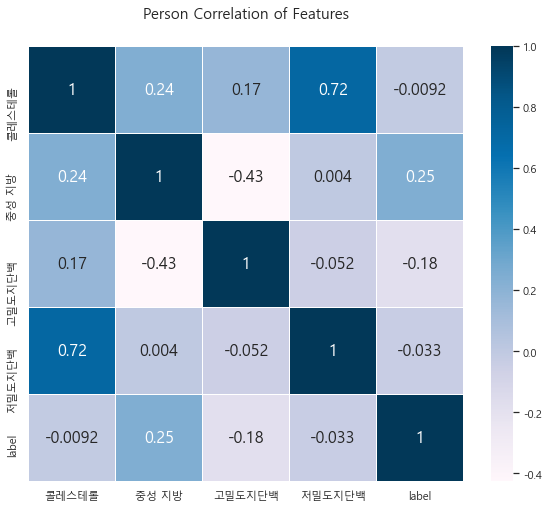

In [46]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Person Correlation of Features", y = 1.05, size = 15)
sns.heatmap(data=train[selected_vars2].astype(float).corr(), linewidths = 0.1, vmax = 1.0,
            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [47]:
#저밀도지단백(ldl-콜레스테롤)과 흡연여부는 거의 관련이 없음
#흡연자가 비흡연자에 비해 중성지방 수치가 높고, 고밀도지단백 수치는 낮음
# 즉, 신체에 악영향을 주는 지표 수치는 높고, 긍정적영향을 주는 지표 수치는 낮음
#고밀도지단백이 중성지방을 감소시키는 것에 도움을 줄 가능성이 꽤 높음

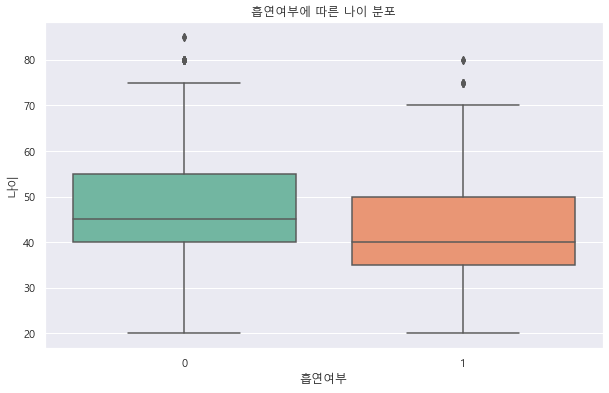

In [48]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(10, 6))
sns.boxplot(data=train, x='label', y='나이', palette='Set2')
plt.title("흡연여부에 따른 나이 분포")
plt.xlabel("흡연여부")
plt.ylabel("나이")
plt.show()
#흡연자가 비흡연자보다 수명이 짧다고 유추가능

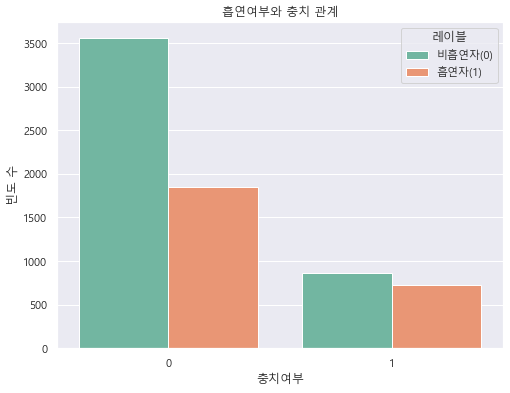

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(data=train, x='충치', hue='label', palette='Set2')
plt.title("흡연여부와 충치 관계")
plt.xlabel("충치여부")
plt.ylabel("빈도 수")
plt.legend(title="레이블", labels=["비흡연자(0)", "흡연자(1)"])
plt.show()

#흡연자가 비흡연보다 충치가 많을거라 생각했지만 그렇지 않음

In [50]:
train.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,43.973571,164.781429,65.932857,24.144423,1.011650,0.227429,99.331857,45.532857,127.144714,0.884900,197.276571,57.355429,115.346857,14.631914,1.083857,1.144696,0.367286
std,12.063793,9.170213,12.978702,3.501945,0.427828,0.419202,21.129670,8.820611,73.918492,0.241523,36.306494,14.506945,41.788153,1.540907,0.392051,0.432735,0.482100
min,20.000000,135.000000,30.000000,14.270000,0.100000,0.000000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.140000,0.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,74.000000,0.800000,173.000000,47.000000,92.000000,13.600000,1.000000,0.840000,0.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,96.000000,45.000000,107.000000,0.900000,195.000000,55.000000,113.000000,14.800000,1.000000,1.100000,0.000000
75%,50.000000,170.000000,75.000000,26.120000,1.200000,0.000000,104.000000,50.000000,161.000000,1.000000,219.000000,66.000000,136.000000,15.700000,1.000000,1.380000,1.000000
max,85.000000,190.000000,130.000000,42.450000,9.900000,1.000000,386.000000,91.000000,999.000000,10.000000,395.000000,157.000000,1340.000000,20.900000,5.000000,5.670000,1.000000


In [51]:
from sklearn.ensemble import IsolationForest

# Isolation Forest 모델 생성
outlier_model = IsolationForest(contamination=0.02)  # contamination 비율은 이상치 비율
outlier_model.fit(train)

# 훈련 데이터에서 이상치 여부 판별
outlier_predictions_train = outlier_model.predict(train)

# 테스트 데이터에서 이상치 여부 판별

# 이상치로 판별된 데이터 제거
train= train[outlier_predictions_train == 1]

# 제거된 이상치로 인해 줄어든 훈련 데이터 크기를 확인
print("훈련 데이터 크기 (이상치 제거 후):", train.shape)


훈련 데이터 크기 (이상치 제거 후): (6860, 17)


In [52]:
train.describe()

,나이,키(cm),몸무게(kg),BMI,시력,충치,공복 혈당,혈압,중성 지방,혈청 크레아티닌,콜레스테롤,고밀도지단백,저밀도지단백,헤모글로빈,요 단백,간 효소율,label
count,6860.000000,6860.000000,6860.000000,6860.000000,6860.000000,6860.000000,6860.000000,6860.000000,6860.000000,6860.000000,6860.000000,6860.000000,6860.000000,6860.000000,6860.000000,6860.000000,6860.000000
mean,43.945335,164.736152,65.734694,24.093773,1.011480,0.222012,98.616764,45.490525,125.539359,0.883222,196.940671,57.467493,115.005685,14.620539,1.067784,1.145729,0.362974
std,11.958611,9.125028,12.666141,3.430890,0.423616,0.415629,19.159970,8.729834,72.229545,0.240103,35.449462,14.404280,39.731228,1.529523,0.336244,0.423295,0.480892
min,20.000000,135.000000,35.000000,15.560000,0.100000,0.000000,57.000000,14.000000,21.000000,0.100000,86.000000,18.000000,1.000000,4.900000,1.000000,0.290000,0.000000
25%,35.000000,160.000000,55.000000,21.600000,0.800000,0.000000,89.000000,40.000000,73.000000,0.800000,173.000000,47.000000,92.000000,13.600000,1.000000,0.850000,0.000000
50%,40.000000,165.000000,65.000000,23.880000,1.000000,0.000000,95.000000,45.000000,106.000000,0.900000,195.000000,56.000000,113.000000,14.800000,1.000000,1.110000,0.000000
75%,50.000000,170.000000,75.000000,25.950000,1.200000,0.000000,103.000000,50.000000,159.000000,1.000000,219.000000,66.000000,135.000000,15.700000,1.000000,1.380000,1.000000
max,85.000000,190.000000,130.000000,42.450000,9.900000,1.000000,386.000000,91.000000,999.000000,10.000000,395.000000,157.000000,1340.000000,20.900000,5.000000,5.670000,1.000000


In [53]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from itertools import product

In [54]:
train['혈청 크레아티닌'].describe()

count    6860.000000
mean        0.883222
std         0.240103
min         0.100000
25%         0.800000
50%         0.900000
75%         1.000000
max        10.000000
Name: 혈청 크레아티닌, dtype: float64

In [55]:
# 파생변수 =>혈청 크레아티닌값에 따라 정상/비정상 여부를 판단하여 1 또는 0으로 기록
train['혈청 크레아티닌_status'] = train['혈청 크레아티닌'].apply(lambda x: 1 if 0.8 <= x <= 1.7 else 0)


In [56]:
train['혈청 크레아티닌_status'].describe()

count    6860.000000
mean        0.749125
std         0.433548
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: 혈청 크레아티닌_status, dtype: float64

In [57]:
## 상관분석

import scipy.stats as stats

PSI_corr = pd.DataFrame()
PSI_corr

Y = train['label'].values

for item in train.drop(columns=['label']).columns :
    X = train[item].values
    new_data = {
        'variable' : [item],
        'Correlation' : [round(stats.pearsonr(X, Y)[0], 2)],
        'p-value' : [round(stats.pearsonr(X, Y)[1], 3)]
    }
   
    new_df = pd.DataFrame(new_data)
    PSI_corr = pd.concat([PSI_corr, new_df])

PSI_corr = PSI_corr.reset_index(drop=True)
PSI_corr

,variable,Correlation,p-value
0,나이,-0.18,0.000
1,키(cm),0.40,0.000
2,몸무게(kg),0.31,0.000
3,BMI,0.12,0.000
4,시력,0.07,0.000
5,충치,0.10,0.000
6,공복 혈당,0.10,0.000
7,혈압,0.02,0.044
8,중성 지방,0.24,0.000
9,혈청 크레아티닌,0.20,0.000


In [58]:
j = len(PSI_corr)
PSI_corr = PSI_corr.reset_index(drop=True)

for i in range(0, j) :
    if PSI_corr['p-value'][i] >= 0.05 :
        PSI_corr = PSI_corr.drop(i)
#     else :
#         if PSI_corr['Correlation'][i] > -0.35 and PSI_corr['Correlation'][i] < 0.35 :
#             PSI_corr = PSI_corr.drop(i)

PSI_corr = PSI_corr.sort_values('Correlation', ascending = False)
PSI_corr = PSI_corr.reset_index(drop=True)
PSI_corr

,variable,Correlation,p-value
0,키(cm),0.40,0.000
1,헤모글로빈,0.40,0.000
2,몸무게(kg),0.31,0.000
3,혈청 크레아티닌_status,0.25,0.000
4,중성 지방,0.24,0.000
5,혈청 크레아티닌,0.20,0.000
6,BMI,0.12,0.000
7,충치,0.10,0.000
8,공복 혈당,0.10,0.000
9,시력,0.07,0.000


In [59]:
from sklearn.model_selection import train_test_split

#x_train, y_train 설정- 상관분석 고려한거
x_train = train.drop(['콜레스테롤', '요 단백', 'label'], axis=1)
y_train = train['label']

# 데이터셋을 학습용과 검증용으로 분할
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)


print(X_train.shape, Y_train.shape)
print(X_val.shape, Y_val.shape)

(5488, 15) (5488,)
(1372, 15) (1372,)


In [60]:
from sklearn.preprocessing import StandardScaler
# 표준화 수행
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [61]:
# Try different models
models = {}

# Support Vector Machines
from sklearn.svm import LinearSVC
models['Support Vector Machines'] = LinearSVC(random_state=42)

# Decision Trees
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier(random_state=42)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
models['Random Forest'] = RandomForestClassifier(random_state=42)

# Naive Bayes
from sklearn.naive_bayes import GaussianNB
models['Naive Bayes'] = GaussianNB()

# XGBoost
from xgboost import XGBClassifier
models['XGBoost'] = XGBClassifier(random_state=42)

# Extra Trees
from sklearn.ensemble import ExtraTreesClassifier
models['Extra Trees'] = ExtraTreesClassifier(random_state=42)

In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV


accuracy_val, precision_val, recall_val, f1_val = {}, {}, {}, {}
accuracy_test, precision_test, recall_test, f1_test = {}, {}, {}, {}


for key in models.keys():
    
# 외부 및 내부 교차검증 설정
    cv_outer = KFold(n_splits=10, shuffle=True)
    cv_inner = KFold(n_splits=5, shuffle=True) 
    
    
    for train_outer_ix, test_outer_ix in cv_outer.split(x_train):
        # 외부 교차 검증을 위한 데이터 준비
        X_train_outer, X_test_outer = x_train[train_outer_ix], x_train[test_outer_ix]
        y_train_outer, y_test_outer = y_train.iloc[train_outer_ix], y_train.iloc[test_outer_ix]

        for train_inner_ix, test_inner_ix in cv_inner.split(X_train_outer):
           # 내부 교차 검증을 위한 데이터 준비
            X_train_inner, X_test_inner = X_train_outer[train_inner_ix], X_train_outer[test_inner_ix]
            y_train_inner, y_test_inner = y_train_outer.iloc[train_inner_ix], y_train_outer.iloc[test_inner_ix]

            models[key].fit(X_train_inner, y_train_inner)
            y_pred_inner = models[key].predict(X_test_inner)

            models[key].fit(X_train_outer, y_train_outer)
            y_pred_outer = models[key].predict(X_test_outer)        
            
             # Calculate metrics            
            accuracy_val[key] = np.mean(accuracy_score(y_test_inner, y_pred_inner))
            precision_val[key] = np.mean(precision_score(y_test_inner, y_pred_inner))
            recall_val[key] = np.mean(recall_score(y_test_inner, y_pred_inner))
            f1_val[key] = np.mean(f1_score(y_test_inner, y_pred_inner))
            
            accuracy_test[key] = np.mean(accuracy_score(y_test_outer, y_pred_outer))
            precision_test[key] = np.mean(precision_score(y_test_outer, y_pred_outer))
            recall_test[key] = np.mean(recall_score(y_test_outer, y_pred_outer))
            f1_test[key] = np.mean(f1_score(y_test_outer, y_pred_outer))
    
# 결과를 DataFrame에 저장
df_model = pd.DataFrame(index=models.keys(), columns=['F1 Score (Validation)', 'Accuracy (Validation)', 'Precision (Validation)', 'Recall (Validation)',
                                                     'F1 Score (Test)', 'Accuracy (Test)', 'Precision (Test)', 'Recall (Test)'])
df_model['F1 Score (Validation)'] = f1_val.values()
df_model['Accuracy (Validation)'] = accuracy_val.values()
df_model['Precision (Validation)'] = precision_val.values()
df_model['Recall (Validation)'] = recall_val.values()
df_model['F1 Score (Test)'] = f1_test.values()
df_model['Accuracy (Test)'] = accuracy_test.values()
df_model['Precision (Test)'] = precision_test.values()
df_model['Recall (Test)'] = recall_test.values()

df_model      

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.p

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.p

C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\svm\_classes.p

,F1 Score (Validation),Accuracy (Validation),Precision (Validation),Recall (Validation),F1 Score (Test),Accuracy (Test),Precision (Test),Recall (Test)
Support Vector Machines,0.564103,0.696921,0.612658,0.522678,0.609218,0.715743,0.646809,0.575758
Decision Trees,0.557127,0.670178,0.551724,0.562637,0.599265,0.682216,0.594891,0.603704
Random Forest,0.645598,0.745543,0.647059,0.644144,0.644628,0.749271,0.639344,0.650000
Naive Bayes,0.639391,0.692869,0.562814,0.740088,0.652529,0.689504,0.576369,0.751880
XGBoost,0.590200,0.701783,0.595506,0.584989,0.629259,0.730321,0.623016,0.635628
Extra Trees,0.574850,0.712318,0.592593,0.558140,0.642857,0.723032,0.673228,0.615108


In [67]:
#서포트벡터머신

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import KFold
from itertools import product
import pandas as pd
import numpy as np

# Set up external and internal cross-validation
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the hyperparameter search space of the SVM
space = dict()
space['C'] = [0.1, 1, 10]
space['kernel'] = ['linear', 'rbf']
space['gamma'] = ['scale', 'auto']
# List for storing results
results = []
best_hyperparameters = [] # list to store best hyperparameters

i = 1

# Performance evaluation for each hyperparameter combination
for C, kernel, gamma in product(space['C'], space['kernel'], space['gamma']):
    
    outer_results = []
    inner_results = []
    j = 1
    
    print(f'{i} Parameter\n' + 'C = {}, kernel = {}, gamma = {}' .format(C, kernel, gamma))

    for train_outer_ix, test_outer_ix in cv_outer.split(x_train):
        # Prepare data for external cross-validation
        X_train_outer, X_test_outer = x_train[train_outer_ix], x_train[test_outer_ix]
        y_train_outer, y_test_outer = y_train.iloc[train_outer_ix], y_train.iloc[test_outer_ix]

        for train_inner_ix, test_inner_ix in cv_inner.split(X_train_outer):
            # Prepare data for internal cross-validation
            X_train_inner, X_test_inner = X_train_outer[train_inner_ix], X_train_outer[test_inner_ix]
            y_train_inner, y_test_inner = y_train_outer.iloc[train_inner_ix], y_train_outer.iloc[test_inner_ix]

            svm = SVC(C=C, kernel=kernel, gamma=gamma, random_state=42)

            svm.fit(X_train_inner, y_train_inner)
            y_pred_inner = svm.predict(X_test_inner)

            # Calculate accuracy, precision, recall, and F1 score
            accuracy_inner = accuracy_score(y_test_inner, y_pred_inner)
            precision_inner = precision_score(y_test_inner, y_pred_inner)
            recall_inner = recall_score(y_test_inner, y_pred_inner)
            f1_inner = f1_score(y_test_inner, y_pred_inner)

            inner_results.append((accuracy_inner, precision_inner, recall_inner, f1_inner))

            svm.fit(X_train_outer, y_train_outer)
            y_pred_outer = svm.predict(X_test_outer)

            # Calculate accuracy, precision, recall, and F1 score
            accuracy_outer = accuracy_score(y_test_outer, y_pred_outer)
            precision_outer = precision_score(y_test_outer, y_pred_outer)
            recall_outer = recall_score(y_test_outer, y_pred_outer)
            f1_outer = f1_score(y_test_outer, y_pred_outer)

            outer_results.append((accuracy_outer, precision_outer, recall_outer, f1_outer))
            j += 1

    # Average value calculation
    val_accuracy = np.mean([accuracy for accuracy, _, _, _ in inner_results])
    val_precision = np.mean([precision for _, precision, _, _ in inner_results])
    val_recall = np.mean([recall for _, _, recall, _ in inner_results])
    val_f1 = np.mean([f1 for _, _, _, f1 in inner_results])

    test_accuracy = np.mean([accuracy for accuracy, _, _, _ in outer_results])
    test_precision = np.mean([precision for _, precision, _, _ in outer_results])
    test_recall = np.mean([recall for _, _, recall, _ in outer_results])
    test_f1 = np.mean([f1 for _, _, _, f1 in outer_results])

    results.append({
        'val_Accuracy': val_accuracy,
        'val_Precision': val_precision,
        'val_Recall': val_recall,
        'val_F1': val_f1,
        'test_Accuracy': test_accuracy,
        'test_Precision': test_precision,
        'test_Recall': test_recall,
        'test_F1': test_f1,
        'C': C,
        'kernel': kernel,
        'gamma' : gamma
    })

    i += 1
    print('Accuracy: {:.2f}%, Precision: {:.2f}%, Recall: {:.2f}%, F1 Score: {:.2f}% \n'.format(
        test_accuracy * 100, test_precision * 100, test_recall * 100, test_f1 * 100))

best_hyperparameters_test_F1 = max(results, key=lambda x: x['test_F1'])
best_hyperparameters_test_Accuracy = max(results, key=lambda x: x['test_Accuracy'])
best_hyperparameters_test_Precision = max(results, key=lambda x: x['test_Precision'])
best_hyperparameters_test_Recall = max(results, key=lambda x: x['test_Recall'])

best_hyperparameters.append((best_hyperparameters_test_F1, best_hyperparameters_test_Accuracy,
                             best_hyperparameters_test_Precision, best_hyperparameters_test_Recall))
    
# 결과 출력
print('각 하이퍼파라미터 조합별 결과:')
svm_df = pd.DataFrame(results)
svm_df = svm_df.sort_values(by=['test_Recall', 'test_Precision', 'test_Accuracy', 'test_F1'], ascending=[True, True, True, True])
svm_df


1 Parameter
C = 0.1, kernel = linear, gamma = scale
Accuracy: 71.01%, Precision: 59.78%, Recall: 61.56%, F1 Score: 60.55% 

2 Parameter
C = 0.1, kernel = linear, gamma = auto
Accuracy: 71.01%, Precision: 59.78%, Recall: 61.56%, F1 Score: 60.55% 

3 Parameter
C = 0.1, kernel = rbf, gamma = scale
Accuracy: 71.95%, Precision: 62.45%, Recall: 57.47%, F1 Score: 59.73% 

4 Parameter
C = 0.1, kernel = rbf, gamma = auto
Accuracy: 71.92%, Precision: 62.42%, Recall: 57.43%, F1 Score: 59.70% 

5 Parameter
C = 1, kernel = linear, gamma = scale
Accuracy: 70.86%, Precision: 59.47%, Recall: 61.90%, F1 Score: 60.56% 

6 Parameter
C = 1, kernel = linear, gamma = auto
Accuracy: 70.86%, Precision: 59.47%, Recall: 61.90%, F1 Score: 60.56% 

7 Parameter
C = 1, kernel = rbf, gamma = scale
Accuracy: 72.81%, Precision: 62.47%, Recall: 63.16%, F1 Score: 62.70% 

8 Parameter
C = 1, kernel = rbf, gamma = auto
Accuracy: 72.83%, Precision: 62.51%, Recall: 63.12%, F1 Score: 62.70% 

9 Parameter
C = 10, kernel = lin

,val_Accuracy,val_Precision,val_Recall,val_F1,test_Accuracy,test_Precision,test_Recall,test_F1,C,kernel,gamma
3,0.716067,0.622146,0.557269,0.587242,0.719242,0.624180,0.574325,0.596954,0.1,rbf,auto
2,0.716294,0.622506,0.557579,0.587577,0.719534,0.624534,0.574654,0.597330,0.1,rbf,scale
11,0.711807,0.603365,0.602914,0.602791,0.716327,0.610532,0.607931,0.608145,10.0,rbf,auto
10,0.711775,0.603253,0.603217,0.602873,0.716618,0.611010,0.607960,0.608421,10.0,rbf,scale
0,0.709896,0.597972,0.615436,0.606122,0.710058,0.597760,0.615630,0.605461,0.1,linear,scale
1,0.709896,0.597972,0.615436,0.606122,0.710058,0.597760,0.615630,0.605461,0.1,linear,auto
4,0.709896,0.597584,0.617625,0.606972,0.708601,0.594726,0.618971,0.605585,1.0,linear,scale
5,0.709896,0.597584,0.617625,0.606972,0.708601,0.594726,0.618971,0.605585,1.0,linear,auto
8,0.709345,0.596814,0.617154,0.606335,0.709621,0.595418,0.623278,0.608089,10.0,linear,scale
9,0.709345,0.596814,0.617154,0.606335,0.709621,0.595418,0.623278,0.608089,10.0,linear,auto


In [184]:
#랜덤포레스트
#외부 및 내부 교차검증 설정
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

#랜덤 포레스트의 하이퍼파라미터 검색 공간 정의
space = dict()
space['n_estimators'] = [150, 300, 450]
space['max_features'] = ['sqrt', 'log2']
space['max_depth'] = [5, 10, 15] 
#결과 저장을 위한 리스트
results = []
best_hyperparameters = [] # 최적 하이퍼파라미터를 저장하기 위한 리스트

i = 1

#각 하이퍼파라미터 조합에 대한 성능 평가
for n_estimators, max_features, max_depth in product(space['n_estimators'], space['max_features'], space['max_depth']):
    
    outer_results = []
    inner_results = []
    j = 1
    
    print(f'{i} Parameter\n' + 'n_estimators = {}, max_features = {}, max_depth = {}' .format(n_estimators, max_features, max_depth))

    for train_outer_ix, test_outer_ix in cv_outer.split(x_train):
        # 외부 교차 검증을 위한 데이터 준비
        X_train_outer, X_test_outer = x_train[train_outer_ix], x_train[test_outer_ix]
        y_train_outer, y_test_outer = y_train.iloc[train_outer_ix], y_train.iloc[test_outer_ix]

        for train_inner_ix, test_inner_ix in cv_inner.split(X_train_outer):
           # 내부 교차 검증을 위한 데이터 준비
            X_train_inner, X_test_inner = X_train_outer[train_inner_ix], X_train_outer[test_inner_ix]
            y_train_inner, y_test_inner = y_train_outer.iloc[train_inner_ix], y_train_outer.iloc[test_inner_ix]

            rf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, random_state=42)

            rf.fit(X_train_inner, y_train_inner)
            y_pred_inner = rf.predict(X_test_inner)

            # 정확도, 정밀도, 재현율, F1 스코어 계산
            accuracy_inner = accuracy_score(y_test_inner, y_pred_inner)
            precision_inner = precision_score(y_test_inner, y_pred_inner)
            recall_inner = recall_score(y_test_inner, y_pred_inner)
            f1_inner = f1_score(y_test_inner, y_pred_inner)

            inner_results.append((accuracy_inner, precision_inner, recall_inner, f1_inner))

            rf.fit(X_train_outer, y_train_outer)
            y_pred_outer = rf.predict(X_test_outer)

            # 정확도, 정밀도, 재현율, F1 스코어 계산
            accuracy_outer = accuracy_score(y_test_outer, y_pred_outer)
            precision_outer = precision_score(y_test_outer, y_pred_outer)
            recall_outer = recall_score(y_test_outer, y_pred_outer)
            f1_outer = f1_score(y_test_outer, y_pred_outer)

            outer_results.append((accuracy_outer, precision_outer, recall_outer, f1_outer))
            j += 1

    # 평균값 계산
    val_accuracy = np.mean([accuracy for accuracy, _, _, _ in inner_results])
    val_precision = np.mean([precision for _, precision, _, _ in inner_results])
    val_recall = np.mean([recall for _, _, recall, _ in inner_results])
    val_f1 = np.mean([f1 for _, _, _, f1 in inner_results])

    test_accuracy = np.mean([accuracy for accuracy, _, _, _ in outer_results])
    test_precision = np.mean([precision for _, precision, _, _ in outer_results])
    test_recall = np.mean([recall for _, _, recall, _ in outer_results])
    test_f1 = np.mean([f1 for _, _, _, f1 in outer_results])

    results.append({
        'val_Accuracy': val_accuracy,
        'val_Precision': val_precision,
        'val_Recall': val_recall,
        'val_F1': val_f1,
        'test_Accuracy': test_accuracy,
        'test_Precision': test_precision,
        'test_Recall': test_recall,
        'test_F1': test_f1,
        'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth': max_depth
    })

    i += 1
    print('Accuracy: {:.2f}%, Precision: {:.2f}%, Recall: {:.2f}%, F1 Score: {:.2f}% \n'.format(
        test_accuracy * 100, test_precision * 100, test_recall * 100, test_f1 * 100))
best_hyperparameters_test_F1 = max(results, key=lambda x: x['test_F1'])
best_hyperparameters_test_Accuracy = max(results, key=lambda x: x['test_Accuracy'])
best_hyperparameters_test_Precision = max(results, key=lambda x: x['test_Precision'])
best_hyperparameters_test_Recall = max(results, key=lambda x: x['test_Recall'])

best_hyperparameters.append((best_hyperparameters_test_F1, best_hyperparameters_test_Accuracy, 
                             best_hyperparameters_test_Precision, best_hyperparameters_test_Recall))
    
# 결과 출력
print('Results for each Hyperparameter Combination:')
rf_df = pd.DataFrame(results)
rf_df = rf_df.sort_values(by=['test_Recall', 'test_Precision','test_Accuracy','test_F1'], ascending=[True, True, True, True])
rf_df


1 Parameter
n_estimators = 150, max_features = sqrt, max_depth = 5
Accuracy: 71.78%, Precision: 61.33%, Recall: 61.10%, F1 Score: 61.07% 

2 Parameter
n_estimators = 150, max_features = sqrt, max_depth = 10
Accuracy: 73.45%, Precision: 62.75%, Recall: 66.70%, F1 Score: 64.54% 

3 Parameter
n_estimators = 150, max_features = sqrt, max_depth = 15
Accuracy: 73.86%, Precision: 63.52%, Recall: 66.22%, F1 Score: 64.71% 

4 Parameter
n_estimators = 150, max_features = log2, max_depth = 5
Accuracy: 71.78%, Precision: 61.33%, Recall: 61.10%, F1 Score: 61.07% 

5 Parameter
n_estimators = 150, max_features = log2, max_depth = 10
Accuracy: 73.45%, Precision: 62.75%, Recall: 66.70%, F1 Score: 64.54% 

6 Parameter
n_estimators = 150, max_features = log2, max_depth = 15
Accuracy: 73.86%, Precision: 63.52%, Recall: 66.22%, F1 Score: 64.71% 

7 Parameter
n_estimators = 300, max_features = sqrt, max_depth = 5
Accuracy: 71.91%, Precision: 61.48%, Recall: 61.33%, F1 Score: 61.26% 

8 Parameter
n_estimator

,val_Accuracy,val_Precision,val_Recall,val_F1,test_Accuracy,test_Precision,test_Recall,test_F1,n_estimators,max_features,max_depth
0,0.717169,0.611591,0.607812,0.609129,0.717784,0.613288,0.610990,0.610654,150,sqrt,5
3,0.717169,0.611591,0.607812,0.609129,0.717784,0.613288,0.610990,0.610654,150,log2,5
12,0.717784,0.611959,0.610943,0.610897,0.718659,0.614439,0.612936,0.612067,450,sqrt,5
15,0.717784,0.611959,0.610943,0.610897,0.718659,0.614439,0.612936,0.612067,450,log2,5
6,0.717201,0.610854,0.611413,0.610594,0.719096,0.614835,0.613311,0.612604,300,sqrt,5
9,0.717201,0.610854,0.611413,0.610594,0.719096,0.614835,0.613311,0.612604,300,log2,5
2,0.733447,0.628198,0.652024,0.639579,0.738630,0.635158,0.662166,0.647134,150,sqrt,15
5,0.733447,0.628198,0.652024,0.639579,0.738630,0.635158,0.662166,0.647134,150,log2,15
13,0.732491,0.625222,0.658182,0.640920,0.736297,0.630264,0.666606,0.646671,450,sqrt,10
16,0.732491,0.625222,0.658182,0.640920,0.736297,0.630264,0.666606,0.646671,450,log2,10


In [185]:
#나이브 베이즈
# 외부 및 내부 교차검증 설정
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

# 하이퍼파라미터 탐색 공간 정의
var_smoothing_values = [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]


# 결과를 저장할 리스트
results = []
best_hyperparameters = []  # 최적의 하이퍼파라미터 저장할 리스트

i = 1

# 각 하이퍼파라미터 조합별로 성능 평가
for var_smoothing in var_smoothing_values:
        
        outer_results = []
        inner_results = []
        j = 1
        
        print(f'{i} Parameter\n' + 'var_smoothing = {}'.format(var_smoothing))
    
        for train_outer_ix, test_outer_ix in cv_outer.split(x_train):
            # 외부 교차 검증을 위한 데이터 준비
            X_train_outer, X_test_outer = x_train[train_outer_ix], x_train[test_outer_ix]
            y_train_outer, y_test_outer = y_train.iloc[train_outer_ix], y_train.iloc[test_outer_ix]

            for train_inner_ix, test_inner_ix in cv_inner.split(X_train_outer):
               # 내부 교차 검증을 위한 데이터 준비
                X_train_inner, X_test_inner = X_train_outer[train_inner_ix], X_train_outer[test_inner_ix]
                y_train_inner, y_test_inner = y_train_outer.iloc[train_inner_ix], y_train_outer.iloc[test_inner_ix]

                nb = GaussianNB(var_smoothing=var_smoothing)

                nb.fit(X_train_inner, y_train_inner)
                y_pred_inner = nb.predict(X_test_inner)

                # 정확도, 정밀도, 재현율, F1 스코어 계산
                accuracy_inner = accuracy_score(y_test_inner, y_pred_inner)
                precision_inner = precision_score(y_test_inner, y_pred_inner)
                recall_inner = recall_score(y_test_inner, y_pred_inner)
                f1_inner = f1_score(y_test_inner, y_pred_inner)

                inner_results.append((accuracy_inner, precision_inner, recall_inner, f1_inner))

                nb.fit(X_train_outer, y_train_outer)
                y_pred_outer = nb.predict(X_test_outer)

                # 정확도, 정밀도, 재현율, F1 스코어 계산
                accuracy_outer = accuracy_score(y_test_outer, y_pred_outer)
                precision_outer = precision_score(y_test_outer, y_pred_outer)
                recall_outer = recall_score(y_test_outer, y_pred_outer)
                f1_outer = f1_score(y_test_outer, y_pred_outer)

                outer_results.append((accuracy_outer, precision_outer, recall_outer, f1_outer))
                j += 1

        # 평균값 계산
        val_accuracy = np.mean([accuracy for accuracy, _, _, _ in inner_results])
        val_precision = np.mean([precision for _, precision, _, _ in inner_results])
        val_recall = np.mean([recall for _, _, recall, _ in inner_results])
        val_f1 = np.mean([f1 for _, _, _, f1 in inner_results])

        test_accuracy = np.mean([accuracy for accuracy, _, _, _ in outer_results])
        test_precision = np.mean([precision for _, precision, _, _ in outer_results])
        test_recall = np.mean([recall for _, _, recall, _ in outer_results])
        test_f1 = np.mean([f1 for _, _, _, f1 in outer_results])

        results.append({
            'val_Accuracy': val_accuracy,
            'val_Precision': val_precision,
            'val_Recall': val_recall,
            'val_F1': val_f1,
            'test_Accuracy': test_accuracy,
            'test_Precision': test_precision,
            'test_Recall': test_recall,
            'test_F1': test_f1,
            'Var Smoothing': var_smoothing
        })

        i += 1
        print('Accuracy: {:.2f}%, Precision: {:.2f}%, Recall: {:.2f}%, F1 Score: {:.2f}% \n'.format(
            test_accuracy * 100, test_precision * 100, test_recall * 100, test_f1 * 100))
best_hyperparameters_test_F1 = max(results, key=lambda x: x['test_F1'])
best_hyperparameters_test_Accuracy = max(results, key=lambda x: x['test_Accuracy'])
best_hyperparameters_test_Precision = max(results, key=lambda x: x['test_Precision'])
best_hyperparameters_test_Recall = max(results, key=lambda x: x['test_Recall'])

best_hyperparameters.append((best_hyperparameters_test_F1, best_hyperparameters_test_Accuracy, 
                             best_hyperparameters_test_Precision, best_hyperparameters_test_Recall))
    
# 결과 출력
print('Results for each Hyperparameter Combination:')
nb_df = pd.DataFrame(results)
nb_df = nb_df.sort_values(by=['test_Recall', 'test_Precision','test_Accuracy','test_F1'], ascending=[True, True, True, True])
nb_df


1 Parameter
var_smoothing = 1e-09
Accuracy: 68.92%, Precision: 55.34%, Recall: 74.32%, F1 Score: 63.39% 

2 Parameter
var_smoothing = 1e-08
Accuracy: 68.92%, Precision: 55.34%, Recall: 74.32%, F1 Score: 63.39% 

3 Parameter
var_smoothing = 1e-07
Accuracy: 68.92%, Precision: 55.34%, Recall: 74.32%, F1 Score: 63.39% 

4 Parameter
var_smoothing = 1e-06
Accuracy: 68.92%, Precision: 55.34%, Recall: 74.32%, F1 Score: 63.39% 

5 Parameter
var_smoothing = 1e-05
Accuracy: 68.92%, Precision: 55.34%, Recall: 74.32%, F1 Score: 63.39% 

Results for each Hyperparameter Combination:


,val_Accuracy,val_Precision,val_Recall,val_F1,test_Accuracy,test_Precision,test_Recall,test_F1,Var Smoothing
0,0.687787,0.552113,0.741451,0.632761,0.689213,0.553413,0.743183,0.633878,1.000000e-09
1,0.687787,0.552113,0.741451,0.632761,0.689213,0.553413,0.743183,0.633878,1.000000e-08
2,0.687787,0.552113,0.741451,0.632761,0.689213,0.553413,0.743183,0.633878,1.000000e-07
3,0.687787,0.552113,0.741451,0.632761,0.689213,0.553413,0.743183,0.633878,1.000000e-06
4,0.687803,0.552127,0.741496,0.632786,0.689213,0.553413,0.743183,0.633878,1.000000e-05


In [186]:
#xgboost
#외부 및 내부 교차 검증 설정
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

#XGBoost의 하이퍼파라미터 검색 공간 정의
space = dict()
space['n_estimators'] = [100, 200, 300, 400]
space['max_depth'] = [3, 6, 9]
space['learning_rate'] = [0.01, 0.1, 0.3]

#결과를 저장하기 위한 리스트
results = []
best_hyperparameters = [] # 최적 하이퍼파라미터를 저장할 리스트

i = 1

#각 하이퍼파라미터 조합에 대한 성능 평가
for n_estimators, max_depth, learning_rate in product(space['n_estimators'], space['max_depth'], space['learning_rate']):
    outer_results = []
    inner_results = []
    j = 1

    print(f'{i}번 조합\n' + 'n_estimators = {}, max_depth = {}, learning_rate = {}'.format(n_estimators, max_depth, learning_rate))

    for train_outer_ix, test_outer_ix in cv_outer.split(x_train):
        # 외부 교차 검증용 데이터 준비
        X_train_outer, X_test_outer = x_train[train_outer_ix], x_train[test_outer_ix]
        y_train_outer, y_test_outer = y_train.iloc[train_outer_ix], y_train.iloc[test_outer_ix]

        for train_inner_ix, test_inner_ix in cv_inner.split(X_train_outer):
            # 내부 교차 검증용 데이터 준비
            X_train_inner, X_test_inner = X_train_outer[train_inner_ix], X_train_outer[test_inner_ix]
            y_train_inner, y_test_inner = y_train_outer.iloc[train_inner_ix], y_train_outer.iloc[test_inner_ix]

            xgb_model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42)

            xgb_model.fit(X_train_inner, y_train_inner)
            y_pred_inner = xgb_model.predict(X_test_inner)

            # 정확도, 정밀도, 재현율, F1 스코어 계산
            accuracy_inner = accuracy_score(y_test_inner, y_pred_inner)
            precision_inner = precision_score(y_test_inner, y_pred_inner)
            recall_inner = recall_score(y_test_inner, y_pred_inner)
            f1_inner = f1_score(y_test_inner, y_pred_inner)

            inner_results.append((accuracy_inner, precision_inner, recall_inner, f1_inner))

            xgb_model.fit(X_train_outer, y_train_outer)
            y_pred_outer = xgb_model.predict(X_test_outer)

            # 정확도, 정밀도, 재현율, F1 스코어 계산
            accuracy_outer = accuracy_score(y_test_outer, y_pred_outer)
            precision_outer = precision_score(y_test_outer, y_pred_outer)
            recall_outer = recall_score(y_test_outer, y_pred_outer)
            f1_outer = f1_score(y_test_outer, y_pred_outer)

            outer_results.append((accuracy_outer, precision_outer, recall_outer, f1_outer))
            j += 1

    # 평균값 계산
    val_accuracy = np.mean([accuracy for accuracy, _, _, _ in inner_results])
    val_precision = np.mean([precision for _, precision, _, _ in inner_results])
    val_recall = np.mean([recall for _, _, recall, _ in inner_results])
    val_f1 = np.mean([f1 for _, _, _, f1 in inner_results])

    test_accuracy = np.mean([accuracy for accuracy, _, _, _ in outer_results])
    test_precision = np.mean([precision for _, precision, _, _ in outer_results])
    test_recall = np.mean([recall for _, _, recall, _ in outer_results])
    test_f1 = np.mean([f1 for _, _, _, f1 in outer_results])

    results. append({
        'val_Accuracy': val_accuracy,
        'val_Precision': val_precision,
        'val_Recall': val_recall,
        'val_F1': val_f1,
        'test_Accuracy': test_accuracy,
        'test_Precision': test_precision,
        'test_Recall': test_recall,
        'test_F1': test_f1,
        'n_estimators': n_estimators,
        'max_depth' : max_depth,
        'learning_rate' : learning_rate
    })

    i += 1
    print('정확도: {:.2f}%, 정밀도: {:.2f}%, 재현율: {:.2f}%, F1 스코어: {:.2f}% \n'.format(
        test_accuracy * 100, test_precision * 100, test_recall * 100, test_f1 * 100))
best_hyperparameters_test_F1 = max(results, key=lambda x: x['test_F1'])
best_hyperparameters_test_Accuracy = max(results, key=lambda x: x['test_Accuracy'])
best_hyperparameters_test_Precision = max(results, key=lambda x: x['test_Precision'])
best_hyperparameters_test_Recall = max(results, key=lambda x: x['test_Recall'])

best_hyperparameters.append((best_hyperparameters_test_F1, best_hyperparameters_test_Accuracy, 
                             best_hyperparameters_test_Precision, best_hyperparameters_test_Recall))
    
# 결과 출력
print('Results for each Hyperparameter Combination:')
xgb_model_df = pd.DataFrame(results)
xgb_model_df = xgb_model_df.sort_values(by=['test_Recall', 'test_Precision','test_Accuracy','test_F1'], ascending=[True, True, True, True])
xgb_model_df

1번 조합
n_estimators = 100, max_depth = 3, learning_rate = 0.01
정확도: 71.21%, 정밀도: 59.69%, 재현율: 64.20%, F1 스코어: 61.70% 

2번 조합
n_estimators = 100, max_depth = 3, learning_rate = 0.1
정확도: 72.86%, 정밀도: 61.94%, 재현율: 65.70%, F1 스코어: 63.64% 

3번 조합
n_estimators = 100, max_depth = 3, learning_rate = 0.3
정확도: 72.84%, 정밀도: 62.58%, 재현율: 63.02%, F1 스코어: 62.70% 

4번 조합
n_estimators = 100, max_depth = 6, learning_rate = 0.01
정확도: 71.97%, 정밀도: 60.41%, 재현율: 66.53%, F1 스코어: 63.20% 

5번 조합
n_estimators = 100, max_depth = 6, learning_rate = 0.1
정확도: 72.87%, 정밀도: 62.23%, 재현율: 64.83%, F1 스코어: 63.37% 

6번 조합
n_estimators = 100, max_depth = 6, learning_rate = 0.3
정확도: 72.99%, 정밀도: 62.81%, 재현율: 63.18%, F1 스코어: 62.89% 

7번 조합
n_estimators = 100, max_depth = 9, learning_rate = 0.01
정확도: 71.85%, 정밀도: 60.55%, 재현율: 64.81%, F1 스코어: 62.51% 

8번 조합
n_estimators = 100, max_depth = 9, learning_rate = 0.1
정확도: 73.38%, 정밀도: 62.97%, 재현율: 64.89%, F1 스코어: 63.85% 

9번 조합
n_estimators = 100, max_depth = 9, learning_rate = 0.3


,val_Accuracy,val_Precision,val_Recall,val_F1,test_Accuracy,test_Precision,test_Recall,test_F1,n_estimators,max_depth,learning_rate
35,0.719242,0.614447,0.608936,0.611388,0.721283,0.621438,0.594234,0.606825,400,9,0.30
23,0.717250,0.612297,0.603642,0.607645,0.721283,0.620034,0.601169,0.609625,300,6,0.30
32,0.717039,0.612320,0.601697,0.606652,0.722741,0.622735,0.602944,0.611664,400,6,0.30
17,0.720424,0.616248,0.610066,0.612829,0.722157,0.621042,0.604147,0.611468,200,9,0.30
26,0.719728,0.615155,0.609579,0.612044,0.723178,0.622207,0.604188,0.612397,300,9,0.30
8,0.720684,0.616327,0.611477,0.613581,0.719242,0.614925,0.606663,0.610019,100,9,0.30
25,0.721963,0.616935,0.618548,0.617462,0.722886,0.619456,0.614715,0.616309,300,9,0.10
34,0.721543,0.616765,0.616187,0.616188,0.723615,0.620114,0.615610,0.617186,400,9,0.10
29,0.717591,0.611925,0.607424,0.609406,0.724198,0.621760,0.617066,0.618345,400,3,0.30
31,0.722336,0.618642,0.614028,0.616023,0.725510,0.623590,0.617181,0.619442,400,6,0.10


In [75]:
#ExtraTreesClassifier 
from sklearn.ensemble import ExtraTreesClassifier

# Set up external and internal cross-validation
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the hyperparameter search space of the ExtraTreesClassifier
space = dict()
space['n_estimators'] = [450, 600]
space['max_features'] = ['sqrt', 'log2']
space['max_depth'] = [20, 30]
space['min_samples_split'] = [8, 10]
space['min_samples_leaf'] = [2, 3]
# List for storing results
results = []
best_hyperparameters = [] # list to store best hyperparameters

i = 1

# Performance evaluation for each hyperparameter combination
for n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf in product(space['n_estimators'], space['max_features'], space['max_depth'], space['min_samples_split'], space['min_samples_leaf']):
    
    outer_results = []
    inner_results = []
    j = 1
    
    print(f'{i} 번째 파라미터 조합\n' + 'n_estimators = {}, max_features = {}, max_depth = {}, min_samples_split = {}, min_samples_leaf = {}' .format(n_estimators, max_features, max_depth, min_samples_split, min_samples_leaf))

    for train_outer_ix, test_outer_ix in cv_outer.split(x_train):
        # Prepare data for external cross-validation
        X_train_outer, X_test_outer = x_train[train_outer_ix], x_train[test_outer_ix]
        y_train_outer, y_test_outer = y_train.iloc[train_outer_ix], y_train.iloc[test_outer_ix]

        for train_inner_ix, test_inner_ix in cv_inner.split(X_train_outer):
            # Prepare data for internal cross-validation
            X_train_inner, X_test_inner = X_train_outer[train_inner_ix], X_train_outer[test_inner_ix]
            y_train_inner, y_test_inner = y_train_outer.iloc[train_inner_ix], y_train_outer.iloc[test_inner_ix]

            extratrees = ExtraTreesClassifier(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, random_state=42)

            extratrees.fit(X_train_inner, y_train_inner)
            y_pred_inner = extratrees.predict(X_test_inner)

            # Calculate accuracy, precision, recall, and F1 score
            accuracy_inner = accuracy_score(y_test_inner, y_pred_inner)
            precision_inner = precision_score(y_test_inner, y_pred_inner)
            recall_inner = recall_score(y_test_inner, y_pred_inner)
            f1_inner = f1_score(y_test_inner, y_pred_inner)

            inner_results.append((accuracy_inner, precision_inner, recall_inner, f1_inner))

            extratrees.fit(X_train_outer, y_train_outer)
            y_pred_outer = extratrees.predict(X_test_outer)

            # Calculate accuracy, precision, recall, and F1 score
            accuracy_outer = accuracy_score(y_test_outer, y_pred_outer)
            precision_outer = precision_score(y_test_outer, y_pred_outer)
            recall_outer = recall_score(y_test_outer, y_pred_outer)
            f1_outer = f1_score(y_test_outer, y_pred_outer)

            outer_results.append((accuracy_outer, precision_outer, recall_outer, f1_outer))
            j += 1

    # Average value calculation
    val_accuracy = np.mean([accuracy for accuracy, _, _, _ in inner_results])
    val_precision = np.mean([precision for _, precision, _, _ in inner_results])
    val_recall = np.mean([recall for _, _, recall, _ in inner_results])
    val_f1 = np.mean([f1 for _, _, _, f1 in inner_results])

    test_accuracy = np.mean([accuracy for accuracy, _, _, _ in outer_results])
    test_precision = np.mean([precision for _, precision, _, _ in outer_results])
    test_recall = np.mean([recall for _, _, recall, _ in outer_results])
    test_f1 = np.mean([f1 for _, _, _, f1 in outer_results])

    results.append({
        'val_Accuracy': val_accuracy,
        'val_Precision': val_precision,
        'val_Recall': val_recall,
        'val_F1': val_f1,
        'test_Accuracy': test_accuracy,
        'test_Precision': test_precision,
        'test_Recall': test_recall,
        'test_F1': test_f1,
        'n_estimators': n_estimators,
        'max_features': max_features,
        'max_depth' : max_depth,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf
    })

    i += 1
    print('정확도: {:.2f}%, 정밀도: {:.2f}%, 재현율: {:.2f}%, F1 스코어: {:.2f}% \n'.format(
        test_accuracy * 100, test_precision * 100, test_recall * 100, test_f1 * 100))

best_hyperparameters_test_F1 = max(results, key=lambda x: x['test_F1'])
best_hyperparameters_test_Accuracy = max(results, key=lambda x: x['test_Accuracy'])
best_hyperparameters_test_Precision = max(results, key=lambda x: x['test_Precision'])
best_hyperparameters_test_Recall = max(results, key=lambda x: x['test_Recall'])

best_hyperparameters.append((best_hyperparameters_test_F1, best_hyperparameters_test_Accuracy,
                             best_hyperparameters_test_Precision, best_hyperparameters_test_Recall))
    
# 결과 출력
print('Results for each Hyperparameter Combination:')
extratrees_df = pd.DataFrame(results)
extratrees_df = extratrees_df.sort_values(by=['test_Recall', 'test_Precision', 'test_Accuracy', 'test_F1'], ascending=[True, True, True, True])
extratrees_df


1 번째 파라미터 조합
n_estimators = 450, max_features = sqrt, max_depth = 20, min_samples_split = 8, min_samples_leaf = 2
정확도: 72.89%, 정밀도: 63.41%, 재현율: 60.29%, F1 스코어: 61.68% 

2 번째 파라미터 조합
n_estimators = 450, max_features = sqrt, max_depth = 20, min_samples_split = 8, min_samples_leaf = 3
정확도: 72.71%, 정밀도: 63.59%, 재현율: 58.46%, F1 스코어: 60.79% 

3 번째 파라미터 조합
n_estimators = 450, max_features = sqrt, max_depth = 20, min_samples_split = 10, min_samples_leaf = 2
정확도: 72.74%, 정밀도: 63.30%, 재현율: 59.71%, F1 스코어: 61.31% 

4 번째 파라미터 조합
n_estimators = 450, max_features = sqrt, max_depth = 20, min_samples_split = 10, min_samples_leaf = 3
정확도: 72.76%, 정밀도: 63.66%, 재현율: 58.36%, F1 스코어: 60.76% 

5 번째 파라미터 조합
n_estimators = 450, max_features = sqrt, max_depth = 30, min_samples_split = 8, min_samples_leaf = 2
정확도: 72.92%, 정밀도: 63.39%, 재현율: 60.39%, F1 스코어: 61.72% 

6 번째 파라미터 조합
n_estimators = 450, max_features = sqrt, max_depth = 30, min_samples_split = 8, min_samples_leaf = 3
정확도: 73.00%, 정밀도: 63.89%, 재현율: 59.

KeyError: 'test_Precision'

In [ ]:
# 랜덤포레스트
# n_estimators = 450, max_features = log2, max_depth = 15
# Accuracy: 74.24%, Precision: 63.93%, Recall: 67.03%, F1 Score: 65.32% 
# 나이브베이즈
# var_smoothing = 1e-05
# Accuracy: 68.92%, Precision: 55.34%, Recall: 74.32%, F1 Score: 63.39% 

# xgboost
# n_estimators = 300, max_depth = 3, learning_rate = 0.01
# Accuracy: 72.23%, Precision: 60.48%, Recall: 68.26%, F1 Score: 64.02% 

# Random Forest 모델의 정확도(Accuracy)가 74.24%로 높음. 이는 모든 클래스를 정확하게 예측한 비율을 의미
# 모델의 정밀도(Precision)는 63.93%로, 양성으로 분류한 것 중에서 실제로 양성인 비율이 꽤 높음.
# 재현율(Recall)은 67.03%로, 실제 양성 클래스(흡연) 중에서 모델이 양성으로 정확하게 분류한 비율. 재현율이 높다는 것은 흡연을 정확하게 식별하는 데 성공한 모델임을 의미
# F1 점수(F1 Score)는 65.32%로, 정밀도와 재현율의 조화평균, 모델의 성능을 종합적으로 평가하는 지표로 사용됨.

# 이 성능 지표들을 고려할 때, Random Forest 모델이 가장 균형 잡힌 성능을 보이며 다양한 클래스를 잘 분류하는 모델로 판단
#그러나 나이브베이즈,xgboost와 앙상블하면 더 좋은 결과가 나올것으로 생각

In [188]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)
cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)
# 랜덤 포레스트 모델 설정 (앞서 언급한 최적 하이퍼파라미터로 설정)
rf_model = RandomForestClassifier(n_estimators=450, max_features='log2', max_depth=15, random_state=42)

# 나이브 베이즈 모델 설정 (앞서 언급한 최적 하이퍼파라미터로 설정)
nb_model = GaussianNB(var_smoothing=1e-05)

#xgboost 모델설정(앞서 언급한 최적 하이퍼파라미터로 설정)
xgb_model = XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.01, random_state=42)

# 앙상블 모델 생성
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model), ('nb', nb_model), ('xgb', xgb_model)],
    voting='soft', weights=[0.65, 0.1, 0.25])
results = []
outer_results = []
inner_results = []

for train_outer_ix, test_outer_ix in cv_outer.split(x_train):
    # 외부 교차 검증용 데이터 준비
    X_train_outer, X_test_outer = x_train[train_outer_ix], x_train[test_outer_ix]
    y_train_outer, y_test_outer = y_train.iloc[train_outer_ix], y_train.iloc[test_outer_ix]
    for train_inner_ix, test_inner_ix in cv_inner.split(X_train_outer):
        # 내부 교차 검증용 데이터 준비
        X_train_inner, X_test_inner = X_train_outer[train_inner_ix], X_train_outer[test_inner_ix]
        y_train_inner, y_test_inner = y_train_outer.iloc[train_inner_ix], y_train_outer.iloc[test_inner_ix]

        ensemble_model.fit(X_train_inner, y_train_inner)
        y_pred_inner = ensemble_model.predict(X_test_inner)

        # 정확도, 정밀도, 재현율, F1 스코어 계산
        accuracy_inner = accuracy_score(y_test_inner, y_pred_inner)
        precision_inner = precision_score(y_test_inner, y_pred_inner)
        recall_inner = recall_score(y_test_inner, y_pred_inner)
        f1_inner = f1_score(y_test_inner, y_pred_inner)

        inner_results.append((accuracy_inner, precision_inner, recall_inner, f1_inner))

        ensemble_model.fit(X_train_outer, y_train_outer)
        y_pred_outer = ensemble_model.predict(X_test_outer)

        # 정확도, 정밀도, 재현율, F1 스코어 계산
        accuracy_outer = accuracy_score(y_test_outer, y_pred_outer)
        precision_outer = precision_score(y_test_outer, y_pred_outer)
        recall_outer = recall_score(y_test_outer, y_pred_outer)
        f1_outer = f1_score(y_test_outer, y_pred_outer)

        outer_results.append((accuracy_outer, precision_outer, recall_outer, f1_outer))

    # 평균값 계산
    val_accuracy = np.mean([accuracy for accuracy, _, _, _ in inner_results])
    val_precision = np.mean([precision for _, precision, _, _ in inner_results])
    val_recall = np.mean([recall for _, _, recall, _ in inner_results])
    val_f1 = np.mean([f1 for _, _, _, f1 in inner_results])

    test_accuracy = np.mean([accuracy for accuracy, _, _, _ in outer_results])
    test_precision = np.mean([precision for _, precision, _, _ in outer_results])
    test_recall = np.mean([recall for _, _, recall, _ in outer_results])
    test_f1 = np.mean([f1 for _, _, _, f1 in outer_results])

    results. append({
    'val_Accuracy': val_accuracy,
    'val_Precision': val_precision,
    'val_Recall': val_recall,
    'val_F1': val_f1,
    'test_Accuracy': test_accuracy,
    'test_Precision': test_precision,
    'test_Recall': test_recall,
    'test_F1': test_f1})
        

# 결과 출력
print('Results for each  Combination:')
ensemble_model_df = pd.DataFrame(results)
ensemble_model_df

Results for each  Combination:


,val_Accuracy,val_Precision,val_Recall,val_F1,test_Accuracy,test_Precision,test_Recall,test_F1
0,0.729348,0.610583,0.706128,0.654602,0.734694,0.610714,0.700820,0.652672
1,0.728618,0.608064,0.706269,0.653271,0.739067,0.623099,0.729256,0.671950
2,0.728267,0.607017,0.703006,0.651334,0.739067,0.641001,0.704308,0.669773
3,0.728983,0.608212,0.704286,0.652528,0.740889,0.638690,0.713747,0.672951
4,0.729996,0.610146,0.704710,0.653796,0.736152,0.628194,0.710342,0.665701
5,0.730050,0.610640,0.706290,0.654764,0.733965,0.618332,0.713885,0.661443
6,0.729580,0.609728,0.705231,0.653760,0.736152,0.624600,0.717053,0.666549
7,0.729753,0.610253,0.705113,0.654011,0.736880,0.623906,0.714715,0.665269
8,0.729600,0.610436,0.704195,0.653736,0.738419,0.624378,0.715192,0.665852
9,0.729446,0.610239,0.705770,0.654276,0.736443,0.618751,0.716749,0.663192


In [189]:
#앙상블 모델 개발

In [116]:
from sklearn.ensemble import VotingClassifier


# 랜덤 포레스트 모델 설정 (앞서 언급한 최적 하이퍼파라미터로 설정)
rf_model = RandomForestClassifier(n_estimators=450, max_features='log2', max_depth=15, random_state=42)


#xgboost 모델설정(앞서 언급한 최적 하이퍼파라미터로 설정)
xgb_model = XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.01, random_state=42)

extra_model = ExtraTreesClassifier(n_estimators = 600, max_features = 'sqrt', max_depth = 20, min_samples_split = 8, min_samples_leaf = 2, random_state=42)

# 앙상블 모델 생성
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model), ('xgb', xgb_model), ('ext', extra_model)],
    voting='soft', weights=[0.7, 0.15, 0.15])

# 앙상블 모델 훈련
ensemble_model.fit(X_train, Y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=15,
                                                     max_features='log2',
                                                     n_estimators=450,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamm...
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...)),
                             ('ext',
                              ExtraTreesClassifier(max_depth=20,
                                                   min_samples_leaf=2,
                                                   min_samples_split=8,
                                                   n_estimators=600,
                                                   random_state=42))],
                 voting='soft', weights=[0.7, 0.15, 0.15])

In [119]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_scores=[]
precision_scores=[]
recall_scores=[]
f1_scores=[]

# prediction
pred = ensemble_model.predict(X_val)

# accuracy, precision, recall, f1 계산
accuracy_score = accuracy_score(Y_val, pred)
accuracy_scores.append(accuracy_score)

precision_socre = precision_score(Y_val, pred)
precision_scores.append(precision_socre)

recall_score = recall_score(Y_val, pred)
recall_scores.append(recall_score)

f1_score = f1_score(Y_val, pred)
f1_scores.append(f1_score)

# accuracy, precision, recall, f1  평균계산
average_accuracy = np.mean(accuracy_scores)
average_precision = np.mean(precision_scores)
average_recall = np.mean(recall_scores)
average_f1 = np.mean(f1_scores)

print("Accuracy_score: {:.3f}%".format(average_accuracy*100))
print("Precision_score: {:.3f}%".format(average_precision*100))
print("Recall_score: {:.3f}%".format(average_recall*100))
print("F1_score: {:.3f}%".format(average_f1*100))

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but ExtraTreesClassifier was fitted without feature names
  warnings.warn(


Accuracy_score: 41.181%
Precision_score: 33.954%
Recall_score: 65.996%
F1_score: 44.839%


In [118]:
from sklearn.ensemble import VotingClassifier


# 랜덤 포레스트 모델 설정 (앞서 언급한 최적 하이퍼파라미터로 설정)
rf_model = RandomForestClassifier(n_estimators=450, max_features='log2', max_depth=15, random_state=42)


#xgboost 모델설정(앞서 언급한 최적 하이퍼파라미터로 설정)
xgb_model = XGBClassifier(n_estimators=300, max_depth=3, learning_rate=0.01, random_state=42)

extra_model = ExtraTreesClassifier(n_estimators = 600, max_features = 'sqrt', max_depth = 20, min_samples_split = 8, min_samples_leaf = 2, random_state=42)

# 앙상블 모델 생성
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model), ('xgb', xgb_model), ('ext', extra_model)],
    voting='soft', weights=[0.7, 0.15, 0.15])

# 앙상블 모델 훈련
ensemble_model.fit(x_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_depth=15,
                                                     max_features='log2',
                                                     n_estimators=450,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamm...
                                            max_delta_step=None, max_depth=3,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None,
                                            predictor=None, random_state=42, ...)),
                             ('ext',
                              ExtraTreesClassifier(max_depth=20,
                                                   min_samples_leaf=2,
                                                   min_samples_split=8,
                                                   n_estimators=600,
                                                   random_state=42))],
                 voting='soft', weights=[0.7, 0.15, 0.15])

In [120]:
# 학습데이터에 했던 전처리 과정 테스트데이터에도 진행
test['혈청 크레아티닌_status'] = test['혈청 크레아티닌'].apply(lambda x: 1 if 0.8 <= x <= 1.7 else 0)
x_test = test.drop(['콜레스테롤', '요 단백'], axis=1)

x_test = scaler.transform(x_test)

In [121]:
#  학습된 앙상블 모델로 test데이터 추론
ensemble_predictions = ensemble_model.predict(x_test)
ensemble_predictions

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [122]:
sample_submission.label=ensemble_predictions

sample_submission.to_csv("C:/Users/user/Desktop/흡연여부/open/su.csv", index=False)
